In [7]:
from api_dev import RsoxsServer, ScanExecutor, ScanPlan

import pandas as pd
import numpy as np

In [8]:
server = await RsoxsServer.create()

In [9]:
energies = np.concatenate([
    np.arange(270, 280, 1),
    np.arange(280, 350, 0.1),
    np.arange(350, 370, 1),
])
thetas = [20, 40, 55, 70, 90]

# Create all (energy, theta) pairs grouped so that all for one theta come first, then next theta, etc.
nexafs_test = pd.DataFrame({
    "Beamline Energy": np.tile(energies, len(thetas)),
    "Sample Theta": np.repeat(thetas, len(energies)),
    "exposure": 1,
})

nexafs_test

,Beamline Energy,Sample Theta,exposure
0,270.0,20,1
1,271.0,20,1
2,272.0,20,1
3,273.0,20,1
4,274.0,20,1
...,...,...,...
3645,365.0,90,1
3646,366.0,90,1
3647,367.0,90,1
3648,368.0,90,1


In [10]:
scanplan = ScanPlan.from_dataframe(
    nexafs_test, 
    shutter="Shutter Output",
)
scanplan.describe()

Scan plan: 3650 points, 2 motors

Unique values:
  Beamline Energy: 730
  Sample Theta: 5
  exposure: 1
  delay: 1 (0.2 s)

Estimated duration: 1.8 h (6570 s)
  per point: 0.1 s (motor) + 0.5 s (api) + exposure + 0.2 s (delay)


In [11]:
import asyncio 

executor = ScanExecutor(server)

task = asyncio.create_task(
    executor.execute_scan(scanplan, progress=False)
)

Point 3650/3650


In [ ]:
await executor.abort()
results = await task

In [12]:
result = await task

In [13]:
result

,Beamline Energy_position,Sample Theta_position,Photodiode_mean,Photodiode_std,TEY signal_mean,TEY signal_std,AI 3 Izero_mean,AI 3 Izero_std,exposure,timestamp
0,270.0,20.0,-0.092365,0.000022,0.048118,0.000016,0.003066,0.000143,1.0,1.770691e+09
1,271.0,20.0,-0.092822,0.000022,0.048826,0.000018,0.003318,0.000144,1.0,1.770691e+09
2,272.0,20.0,-0.092421,0.000021,0.049089,0.000018,0.002911,0.000146,1.0,1.770691e+09
3,273.0,20.0,-0.092572,0.000022,0.050668,0.000020,0.003979,0.000145,1.0,1.770691e+09
4,274.0,20.0,-0.092631,0.000022,0.052266,0.000018,0.004353,0.000147,1.0,1.770691e+09
...,...,...,...,...,...,...,...,...,...,...
3645,365.0,90.0,-0.097540,0.000022,0.147808,0.000019,0.301097,0.000284,1.0,1.770701e+09
3646,366.0,90.0,-0.097399,0.000021,0.149037,0.000022,0.303414,0.000298,1.0,1.770701e+09
3647,367.0,90.0,-0.097579,0.000022,0.150137,0.000029,0.304519,0.000284,1.0,1.770701e+09
3648,368.0,90.0,-0.097601,0.000021,0.151258,0.000026,0.307470,0.000325,1.0,1.770701e+09


In [20]:
processed_results = result.copy()
processed_results["Absorbance"] = processed_results["TEY signal_mean"] / processed_results["AI 3 Izero"]

KeyError: 'TEY signal'

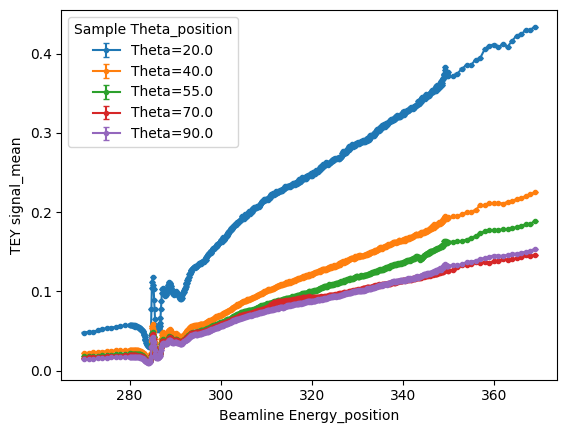

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for theta, group in result.groupby("Sample Theta_position"):
    ax.errorbar(
        group["Beamline Energy_position"],
        group["TEY signal_mean"],
        yerr=group["TEY signal_std"],
        label=f"Theta={theta}",
        fmt=".-",
        capsize=2,
    )

ax.set_xlabel("Beamline Energy_position")
ax.set_ylabel("TEY signal_mean")
ax.legend(title="Sample Theta_position")
plt.show()


In [22]:
# Save the results to a csv file
result.to_csv("nexafs_results.csv", index=False)

In [24]:
server.

AttributeError: 'RsoxsServer' object has no attribute 'disconnect'